In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as sn
import scipy, scipy.stats
from sklearn.model_selection import train_test_split

from statsmodels.api import add_constant

import statsmodels.discrete.discrete_model as sm
from statsmodels.api import add_constant

from sklearn import metrics

In [167]:
data=pd.read_csv('parole.csv')

In [168]:
data.head()

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator
0,1,1,33.2,1,5.5,18,0,4,0
1,0,1,39.7,1,5.4,12,0,3,0
2,1,2,29.5,1,5.6,12,0,3,0
3,1,1,22.4,1,5.7,18,0,1,0
4,1,2,21.6,1,5.4,12,0,1,0


In [169]:
data.shape

(738, 9)

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 9 columns):
male                 738 non-null int64
race                 738 non-null int64
age                  738 non-null float64
state                738 non-null int64
time.served          738 non-null float64
max.sentence         738 non-null int64
multiple.offenses    738 non-null int64
crime                738 non-null int64
violator             738 non-null int64
dtypes: float64(2), int64(7)
memory usage: 52.0 KB


In [171]:
data.groupby('violator').count()

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime
violator,,,,,,,,
0,597,597,597,597,597,597,597,597
1,141,141,141,141,141,141,141,141


In [172]:
data.drop('age', axis=1,inplace=True)

In [173]:
data['state']= data['state'].astype('category')
data['crime']= data['crime'].astype('category')
data['male']= data['male'].astype('category')
data['race']=data['race'].astype('category')

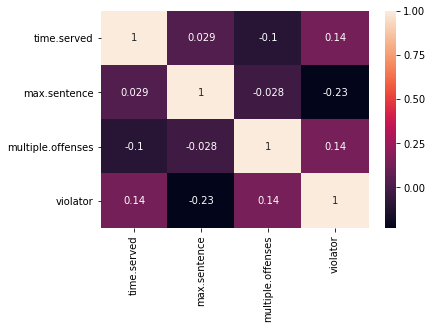

In [174]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [194]:
data.head()

,time.served,max.sentence,multiple.offenses,violator,male_1,race_2,state_2,state_3,state_4,crime_2,crime_3,crime_4
0,5.5,18,0,0,1,0,0,0,0,0,0,1
1,5.4,12,0,0,0,0,0,0,0,0,1,0
2,5.6,12,0,0,1,1,0,0,0,0,1,0
3,5.7,18,0,0,1,0,0,0,0,0,0,0
4,5.4,12,0,0,1,1,0,0,0,0,0,0


In [176]:
data=pd.get_dummies(data, drop_first=True)

In [177]:
x=data.drop('violator',axis=1)
y=data['violator']

In [178]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=1)

In [179]:
logreg= LogisticRegression()

In [180]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [181]:
pred = logreg.predict(x_test)

In [195]:
predprob= logreg.predict_proba(x_test)

predlist=[]
for i in predprob[:,1]:
    if i>=0.5:
        predlist.append(1)
    else:
        predlist.append(0)

predarr=np.array(predlist)

In [196]:
cross=pd.crosstab(y_test,predarr)
cross

col_0,0,1
violator,,
0,168,4
1,29,21


In [197]:
tn= cross[0][0]
fp= cross[1][0]
fn= cross[0][1]
tp= cross[1][1]

accuracy=round((tn+tp)/(tn+tp+fn+fp),3)
error= round(1- accuracy,3)
sensi= round(tp/(tp+fn),3)
prec = round(tp/(tp+fp),3)
speci = round(tn/(tn+fp),3)

print('Accuracy = ', accuracy, '\nError = ', error, '\nSensitivity = ', sensi,'\nPrecision = ',prec,'\nSpecificity =', speci)

Accuracy =  0.851 
Error =  0.149 
Sensitivity =  0.42 
Precision =  0.84 
Specificity = 0.977


In [185]:
x2= add_constant(x_train)

In [186]:
logit= sm.Logit(y_train,x2)

In [187]:
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.311126
         Iterations 8


In [188]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               violator   No. Observations:                  516
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                           11
Date:                Sun, 30 Dec 2018   Pseudo R-squ.:                  0.3321
Time:                        12:51:08   Log-Likelihood:                -160.54
converged:                       True   LL-Null:                       -240.36
                                        LLR p-value:                 1.580e-28
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.0326      0.854     -4.722      0.000      -5.707      -2.359
time.served           0.2038      0.068      2.991      0.003       0.070       0.337
max.sentence          0.

C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.05, 1.05)

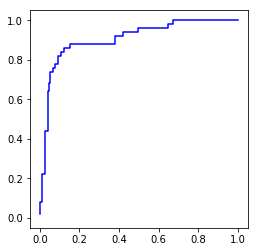

In [189]:
pred_test= logreg.predict_proba(x_test)
fpr,tpr,thresold= metrics.roc_curve(y_test, pred_test[:,1])
plt.plot(fpr,tpr, label='ROC Curve', color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

In [190]:
metrics.auc(fpr,tpr)

0.9062790697674419

In [205]:
x1=[2,5,9]
x2=[5,9,11,15]

In [207]:
s1=set(x1)
s2=set(x2)

In [217]:
and or 

{5, 9}